In [1]:
import os 

import string
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
# nltk.download('all')

# Initialise the constants

In [3]:
SRC_TRAIN_CSV_FILE_PATH = '../data/source/twitter_training.csv'
SRC_TEST_CSV_FILE_PATH = '../data/source/twitter_validation.csv'

HEADERS = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
SENTIMENT_ENCODE = {
    'Positive': 0,
    'Neutral': 1,
    'Negative': 2,
    'Irrelevant': 3
}

STOPWORDS = set(stopwords.words('english'))
PUNCTUATIONS = list(string.punctuation)

print(STOPWORDS)

{'been', 'we', "you'll", 'if', 'will', 'shan', 'through', 'after', 'mightn', 'off', 'each', 'wouldn', 'about', 'against', 'mustn', 'was', "you're", 'once', 'yourselves', 'are', 'between', 'do', "aren't", 'they', 'be', 'all', 'weren', 'wasn', 'with', 'into', 'where', 'because', 'these', 'theirs', 'himself', 'that', 's', "couldn't", 'haven', 'did', 'and', "she's", 'him', "shan't", 'those', 'nor', "you've", 'ain', 'yourself', 'herself', 'few', "don't", 'only', "hasn't", 'shouldn', 'couldn', 'it', 'hasn', 'why', 'won', 'his', 'can', 'here', 'below', 'or', 'the', 'o', 'further', 'is', 'he', "you'd", "mightn't", 'there', 'she', 'were', 'a', 'them', 'having', "it's", 'does', 'll', 'by', 'while', 'as', 'its', 'being', 'until', 'not', 'themselves', 'before', 'from', 'most', 'in', 'aren', 'me', "didn't", 'of', 'hadn', 'm', 'but', 'don', 'has', 'same', 'some', 'on', 'd', 'this', 've', 'again', 'their', 'my', 'just', 'ours', 'to', 'too', 'who', "haven't", 'any', 'am', 'no', 're', 'itself', 'isn', 

# Reading the file

In [4]:
df = pd.read_csv(SRC_TRAIN_CSV_FILE_PATH, names=HEADERS)
df.shape

(74682, 4)

In [5]:
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Getting the structure of data and further analysing

1. df.info() -> to get datatypes of each column.
2. Getting the unique values of ```sentiment``` columns, and create the mapping variable descibe in the next step.
3. changing the sentiment to integer values, please refer ```SENTIMENT_ENCODE``` variable.
4. Getting the count for each ```sentiment``` in the first visualization ```fig-1: label count plot```

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
## Dropping the duplicates
print(f'total number of duplicate records: {len(df)-len(df.drop_duplicates())}')
df = df.drop_duplicates()

total number of duplicate records: 2700


In [8]:
## Getting the unique values for sentiment
for i in list(df['sentiment'].unique()):
    print(i)    

Positive
Neutral
Negative
Irrelevant


In [9]:
## converting the columns to integers
df['sentiment'] = df['sentiment'].map(SENTIMENT_ENCODE)

In [10]:
df.describe()

,Tweet ID,sentiment
count,71982.000000,71982.000000
mean,6437.396307,1.377094
std,3743.198550,1.065362
min,1.000000,0.000000
25%,3199.000000,0.000000
50%,6434.000000,1.000000
75%,9607.000000,2.000000
max,13200.000000,3.000000


[]

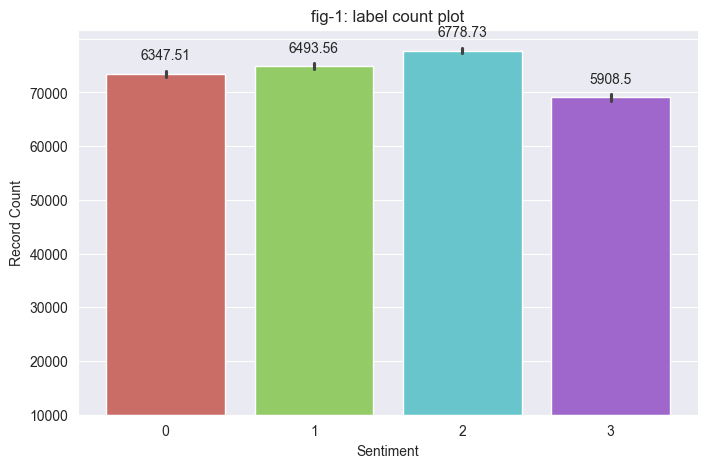

In [11]:
# Visualizint the amount of data per sentiment
plt.figure(figsize=(8, 5))
count_plot = sns.barplot(data=df, y='Tweet ID', x = 'sentiment', palette = 'hls')
plt.ylabel('Record Count')
plt.xlabel('Sentiment')
# count_plot.set_yticks()
count_plot.set_yticklabels([x for x in range(10000, len(df), 10000)])
for container in count_plot.containers:
    count_plot.bar_label(container, padding=8.0)
plt.title('fig-1: label count plot')
plt.plot()


# Data preprocessing

In [12]:
data = df.copy()
data = data[['sentiment', 'Tweet content']]

In [13]:
# lower casing the data(text column)
data['Tweet content'] = data['Tweet content'].str.lower()
data.head()

,sentiment,Tweet content
0,0,im getting on borderlands and i will murder yo...
1,0,i am coming to the borders and i will kill you...
2,0,im getting on borderlands and i will kill you ...
3,0,im coming on borderlands and i will murder you...
4,0,im getting on borderlands 2 and i will murder ...


## Defining certain functions, to clean the data further

In [14]:
def clean_stopwords(text):
    return " ".join([word for word in word_tokenize(str(text)) if word not in STOPWORDS])

def clean_punctuations(text):
    return "".join([char for char in str(text) if char not in PUNCTUATIONS])
        

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

data['Tweet content'] = data['Tweet content'].apply(lambda x: clean_stopwords(x))
data['Tweet content'] = data['Tweet content'].apply(lambda x: clean_punctuations(x))
data['Tweet content'] = data['Tweet content'].apply(lambda x: cleaning_URLs(x))
data['Tweet content'] = data['Tweet content'].apply(lambda x: cleaning_numbers(x))
data['Tweet content'] = data['Tweet content'].apply(lambda x: word_tokenize(x))

print(data.head())

   sentiment                     Tweet content
0          0    im getting borderlands murder 
1          0              coming borders kill 
2          0      im getting borderlands kill 
3          0     im coming borderlands murder 
4          0  im getting borderlands 2 murder 
   sentiment                       Tweet content
0          0  [im, getting, borderlands, murder]
1          0             [coming, borders, kill]
2          0    [im, getting, borderlands, kill]
3          0   [im, coming, borderlands, murder]
4          0  [im, getting, borderlands, murder]
